# Лабораторная работа №1. Чичикин Тимофей Дмитриевич ИУ5-25М



Задание:

Выбрать набор данных (датасет).

1. Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
2. История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
3. На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
4. Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
5. Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
6. История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных
df = pd.read_csv('insurance.csv')

In [2]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## График Boxplot 

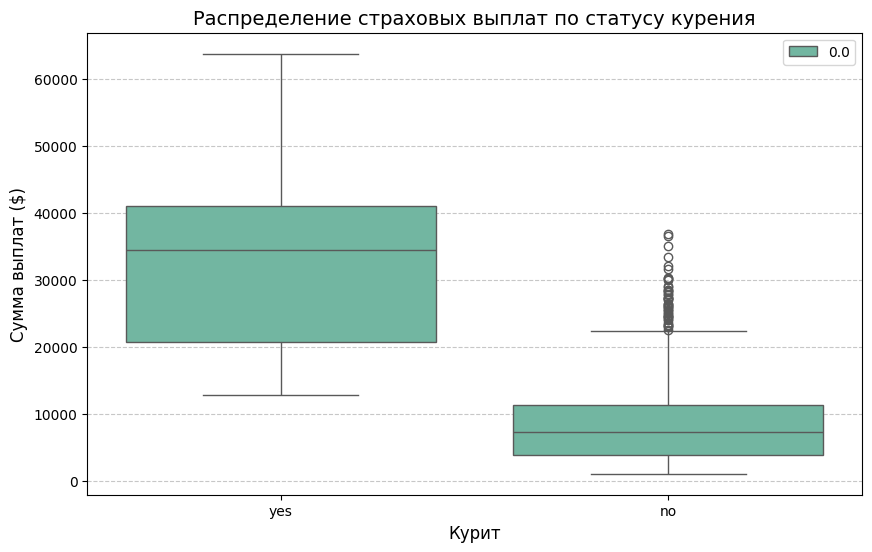

In [4]:
# Итоговый график
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2', hue=0.0)
plt.title('Распределение страховых выплат по статусу курения', fontsize=14)
plt.xlabel('Курит', fontsize=12)
plt.ylabel('Сумма выплат ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Итог:** Курящие клиенты имеют значительно более высокие страховые выплаты. Медианное значение выплат для курящих почти в 4 раза выше, чем для некурящих. Это подтверждает очевидный факт, что курение является серьезным фактором риска для здоровья.

## График pie

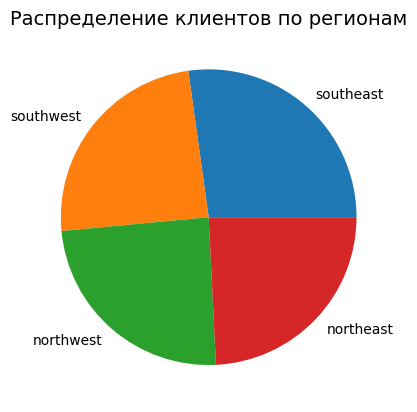

In [5]:
region_counts = df['region'].value_counts()

plt.pie(region_counts, labels=region_counts.index)
plt.title('Распределение клиентов по регионам', fontsize=14)
plt.show()

**Итог:** Клиенты распределены по регионам относительно равномерно, с небольшим перевесом юго-восточного региона. Это может быть полезно для планирования региональных маркетинговых стратегий и распределения ресурсов компании

# Тепловая карта

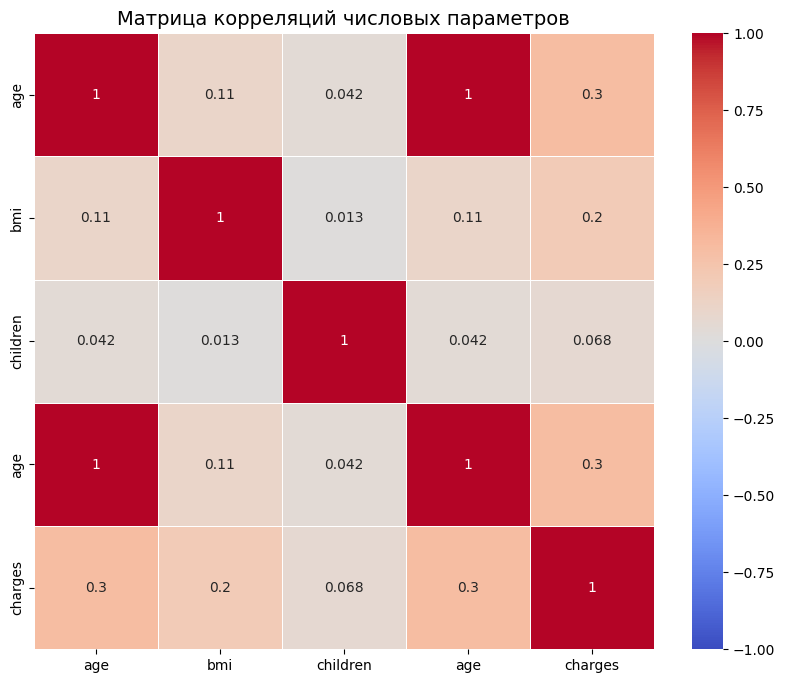

In [7]:

plt.figure(figsize=(10, 8))
corr = df[['age', 'bmi', 'children','age', 'charges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, linecolor='white')
plt.title('Матрица корреляций числовых параметров', fontsize=14)
plt.show()

**Итог:** Наибольшая корреляция наблюдается между возрастом и страховыми выплатами (0.3), что логично, так как с возрастом увеличиваются риски для здоровья. ИМТ также показывает положительную корреляцию с выплатами (0.2). Интересно, что количество детей почти не коррелирует с суммой выплат

## Столбчатая диаграмма 

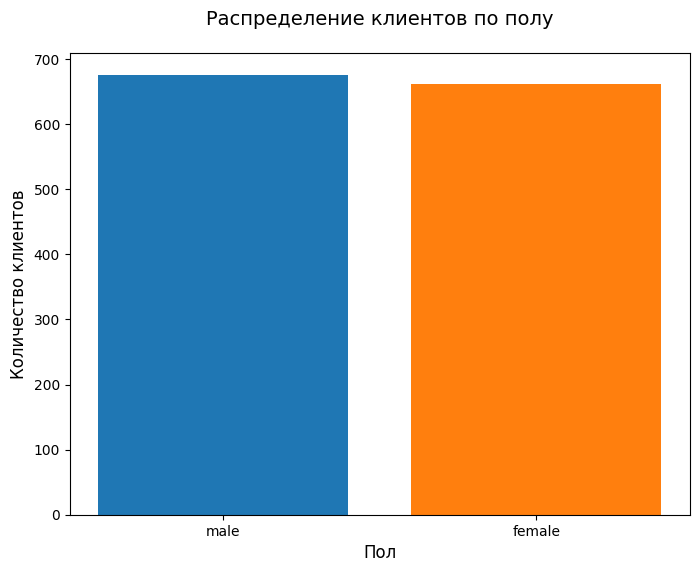

In [8]:
plt.figure(figsize=(8, 6))

gender_counts = df['sex'].value_counts()
colors = ['#1f77b4', '#ff7f0e']  

bars = plt.bar(gender_counts.index, gender_counts.values, color=colors)

plt.title('Распределение клиентов по полу', fontsize=14, pad=20)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Количество клиентов', fontsize=12)


plt.show()


**Итог:** Распределение клиентов страховой компании практически одинаково между мужчинами и женщинами.

## Точечная диаграмма 

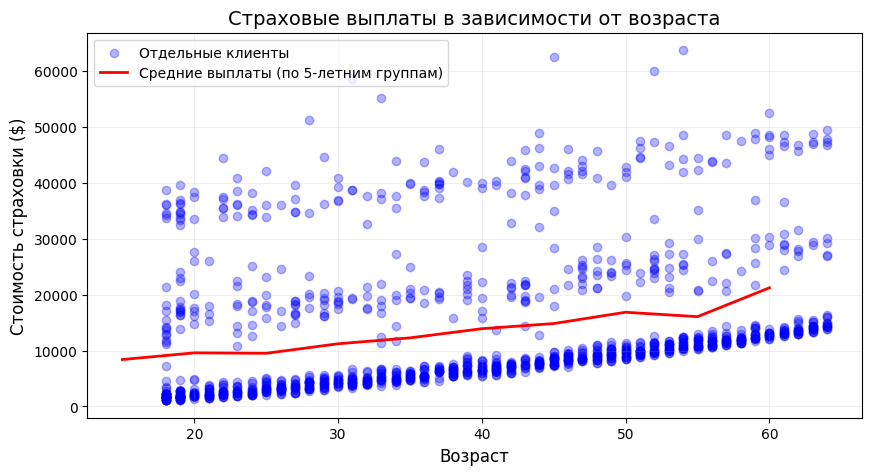

In [9]:
plt.figure(figsize=(10, 5))

# Точечный график с прозрачностью
plt.scatter(
    df['age'], 
    df['charges'], 
    alpha=0.3, 
    color='blue',
    label='Отдельные клиенты'
)

# Линия средних значений по 5-летним группам
df['age_group'] = (df['age'] // 5) * 5  # Группы по 5 лет
mean_charges = df.groupby('age_group')['charges'].mean()

plt.plot(
    mean_charges.index, 
    mean_charges.values, 
    color='red', 
    linewidth=2,
    label='Средние выплаты (по 5-летним группам)'
)

# Настройки
plt.title('Страховые выплаты в зависимости от возраста', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Стоимость страховки ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.2)

plt.show()

**Итог:** Чем старше клиент, тем выше средняя стоимость страховки

## Вывод